In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving covid countrywise 29_6_2020.csv to covid countrywise 29_6_2020.csv


In [ ]:
ds=pd.read_csv('covid countrywise 29_6_2020.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021825 entries, 0 to 1021824
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   iso_code                    209 non-null    object 
 1   continent                   208 non-null    object 
 2   location                    209 non-null    object 
 3   date                        209 non-null    object 
 4   total_cases                 209 non-null    float64
 5   new_cases                   209 non-null    float64
 6   total_deaths                209 non-null    float64
 7   new_deaths                  209 non-null    float64
 8   total_cases_per_million     209 non-null    float64
 9   new_cases_per_million       209 non-null    float64
 10  total_deaths_per_million    209 non-null    float64
 11  new_deaths_per_million      209 non-null    float64
 12  population                  209 non-null    float64
 13  population_density         

In [ ]:
x=ds.iloc[0:209,:-1]

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   iso_code                    209 non-null    object 
 1   continent                   208 non-null    object 
 2   location                    209 non-null    object 
 3   date                        209 non-null    object 
 4   total_cases                 209 non-null    float64
 5   new_cases                   209 non-null    float64
 6   total_deaths                209 non-null    float64
 7   new_deaths                  209 non-null    float64
 8   total_cases_per_million     209 non-null    float64
 9   new_cases_per_million       209 non-null    float64
 10  total_deaths_per_million    209 non-null    float64
 11  new_deaths_per_million      209 non-null    float64
 12  population                  209 non-null    float64
 13  population_density          198 non

In [ ]:
x.fillna(value=x.mean(),inplace=True)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   iso_code                    209 non-null    object 
 1   continent                   208 non-null    object 
 2   location                    209 non-null    object 
 3   date                        209 non-null    object 
 4   total_cases                 209 non-null    float64
 5   new_cases                   209 non-null    float64
 6   total_deaths                209 non-null    float64
 7   new_deaths                  209 non-null    float64
 8   total_cases_per_million     209 non-null    float64
 9   new_cases_per_million       209 non-null    float64
 10  total_deaths_per_million    209 non-null    float64
 11  new_deaths_per_million      209 non-null    float64
 12  population                  209 non-null    float64
 13  population_density          209 non

In [ ]:
y=ds.iloc[0:209,-1]

In [ ]:
print(y)

0      64.83
1      78.57
2      76.88
3      83.73
4      61.15
       ...  
204    70.26
205    66.12
206    63.89
207    61.49
208    72.58
Name: life_expectancy, Length: 209, dtype: float64


In [ ]:
y.isnull().sum()

3

In [ ]:
y.fillna(value=y.mean(),inplace=True)
y.isnull().sum()

0

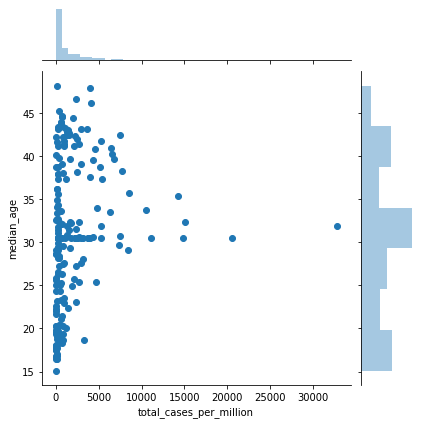

In [ ]:
res=sns.jointplot(x=x['total_cases_per_million'],y=x['median_age'])
plt.show()

In [ ]:
loc=pd.get_dummies(x['location'],drop_first=True)
cont=pd.get_dummies(x['continent'],drop_first=True)
x.drop(['location','continent'],axis=1,inplace=True)
x=pd.concat([x,loc,cont],axis=1)
x.head()

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,...,South Korea,South Sudan,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Trinidad and Tobago,Tunisia,Turkey,Turks and Caicos Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,World,Yemen,Zambia,Zimbabwe,Asia,Europe,North America,Oceania,South America
0,AFG,2020-06-29,30967.0,351.0,721.0,18.0,795.487,9.017,18.521,0.462,38928341.0,54.422,18.600000,2.581000,1.337000,1803.987000,13.936364,597.029,9.59,10.291671,32.645181,37.746000,0.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,ALB,2020-06-29,2402.0,72.0,55.0,2.0,834.665,25.019,19.112,0.695,2877800.0,104.871,38.000000,13.188000,8.643000,11803.431000,1.100000,304.195,10.08,7.100000,51.200000,50.349217,2.890000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,DZA,2020-06-29,13273.0,305.0,897.0,5.0,302.684,6.955,20.456,0.114,43851043.0,17.348,29.100000,6.211000,3.857000,13913.839000,0.500000,278.364,6.73,0.700000,30.400000,83.741000,1.900000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,AND,2020-06-29,855.0,0.0,52.0,0.0,11065.812,0.000,673.008,0.000,77265.0,163.755,30.472432,8.748819,5.494516,19181.669758,13.936364,109.135,7.97,29.000000,37.800000,50.349217,3.011055,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,AGO,2020-06-29,267.0,23.0,11.0,1.0,8.124,0.700,0.335,0.030,32866268.0,23.890,16.800000,2.405000,1.362000,5819.495000,13.936364,276.045,3.94,10.291671,32.645181,26.664000,3.011055,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy',n_estimators=50,random_state=0,n_jobs=3)

In [ ]:
rf.fit(xtr,ytr)

TypeError: ignored